### DLFA : Assignment 1   Onkar Sabnis (18CH300018)
***
#### <font color = 'BLUE'><b><u>*The notebook is divided into different sections/segments as per the questions of the Assignment, Contents of the Notebook are:*</u></b></font>




#### • Training a LeNet Model with MNIST data (On Batch_sizes = 512 and 256) using SGD for optimization (This completes Q2, Q3, Q4 and Q5)
#### • Varying the Batch Size (32 to 1024) and plotting train and test error with changing batch_size (Q6.a)
#### • Varying the Learning Rates and plotting Test Error vs Learning Rate (Q6.b)
#### • Varying the learning rate with number of epochs(SGDR) (Q6.c)

#### **Loading Libraries**

In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision



import matplotlib.pyplot as plt
%matplotlib inline
import time



In [2]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

#### **Q2), Q3) and Q5) LeNet_Model (Batch_Size = 512)**

In [3]:
### Loading Data

apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 512 # change according to system specs

trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize, shuffle=True, num_workers=0) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,shuffle=False, num_workers=0) # Creating dataloader



Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))



No. of samples in train set: 60000
No. of samples in test set: 10000


In [5]:
### Model Architecture (Fully Connected)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x,dim=1)
        

net = LeNet()
print(net)



LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
criterion = nn.CrossEntropyLoss() 
learning_rate = 0.1
optimizer1 = optim.SGD(net.parameters(), lr=learning_rate, momentum = 0.9) # ADAM 
num_epochs = 20

In [10]:
train_loss = []
train_acc = []
for epoch in range(num_epochs):
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        # Initializing model gradients to zero
        optimizer1.zero_grad() 
        # Data feed-forward through the network
        outputs = net(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = criterion(outputs, labels) 
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==labels)    
        
    totalLoss = running_loss/(i+1)
    # Calculating gradients
    totalLoss.backward()
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

Epoch 1/20 : Training loss: 2.3025 | Training Accuracy: 6.4300
Epoch 2/20 : Training loss: 2.3025 | Training Accuracy: 6.2950
Epoch 3/20 : Training loss: 2.3025 | Training Accuracy: 6.1100
Epoch 4/20 : Training loss: 2.3025 | Training Accuracy: 5.8667
Epoch 5/20 : Training loss: 2.3025 | Training Accuracy: 5.6633
Epoch 6/20 : Training loss: 2.3025 | Training Accuracy: 5.3583
Epoch 7/20 : Training loss: 2.3025 | Training Accuracy: 5.2200
Epoch 8/20 : Training loss: 2.3025 | Training Accuracy: 5.0667
Epoch 9/20 : Training loss: 2.3025 | Training Accuracy: 5.2500
Epoch 10/20 : Training loss: 2.3025 | Training Accuracy: 5.6600
Epoch 11/20 : Training loss: 2.3025 | Training Accuracy: 6.4317
Epoch 12/20 : Training loss: 2.3025 | Training Accuracy: 7.3300
Epoch 13/20 : Training loss: 2.3025 | Training Accuracy: 8.3183
Epoch 14/20 : Training loss: 2.3025 | Training Accuracy: 9.5333
Epoch 15/20 : Training loss: 2.3025 | Training Accuracy: 11.0050
Epoch 16/20 : Training loss: 2.3025 | Training A

In [11]:
correct_pred1=0
for data in testLoader:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net(inputs)
    # Predicted class is the one with maximum probability
    preds1 = torch.argmax(output,dim=1)
    correct_pred1 += torch.sum(preds1==labels)

test_accuracy = correct_pred1.item()/10000.0
print('Testing accuracy (Batch size=512, lr=0.1 = ',test_accuracy*100) #for bathch1

Testing accuracy (Batch size=512, lr=0.1 =  11.4


Text(0, 0.5, 'Training')

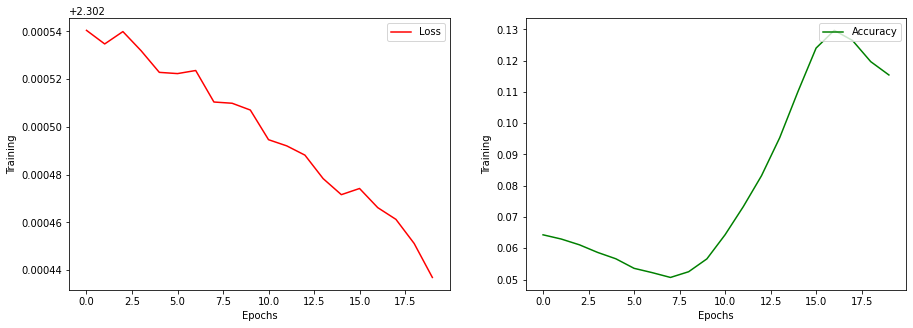

In [12]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

#### **Q2), Q3) and Q5) LeNet_Model (Batch_Size = 256)**

In [13]:
BatchSize2 = 256 # change according to system specs

trainset2 = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader2 = torch.utils.data.DataLoader(trainset2, batch_size=BatchSize2,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset2 = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader2 = torch.utils.data.DataLoader(testset2, batch_size=BatchSize2,
                                         shuffle=False, num_workers=4) # Creating dataloader

In [14]:
# Size of train and test datasets
print('No. of samples in train set2: '+str(len(trainLoader2.dataset)))
print('No. of samples in test set2: '+str(len(testLoader2.dataset)))

No. of samples in train set2: 60000
No. of samples in test set2: 10000


In [15]:
net2 = LeNet()

In [16]:
criterion = nn.CrossEntropyLoss() 
learning_rate2 = 0.1
optimizer2 = optim.SGD(net2.parameters(), lr=learning_rate2, momentum=0.8) # SGD
num_epochs2 = 20

In [17]:
train_loss2 = []
train_acc2 = []
for epoch in range(num_epochs2):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader2):
        inputs,labels = data
        # Initializing model gradients to zero
        optimizer2.zero_grad() 
        # Data feed-forward through the network
        outputs2 = net2(inputs)
        # Predicted class is the one with maximum probability
        preds2 = torch.argmax(outputs2,dim=1)
        # Finding the loss
        loss = criterion(outputs2, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds2==labels)    
        
    totalLoss2 = running_loss/(i+1)
    # Calculating gradients
    totalLoss2.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer2.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss2.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc2.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs2,epoch_loss,epoch_acc*100))

Epoch 1/20 : Training loss: 2.3026 | Training Accuracy: 9.5283
Epoch 2/20 : Training loss: 2.3026 | Training Accuracy: 9.5067
Epoch 3/20 : Training loss: 2.3026 | Training Accuracy: 9.4667
Epoch 4/20 : Training loss: 2.3026 | Training Accuracy: 9.4200
Epoch 5/20 : Training loss: 2.3025 | Training Accuracy: 9.3867
Epoch 6/20 : Training loss: 2.3025 | Training Accuracy: 9.3433
Epoch 7/20 : Training loss: 2.3025 | Training Accuracy: 9.2683
Epoch 8/20 : Training loss: 2.3025 | Training Accuracy: 9.1600
Epoch 9/20 : Training loss: 2.3025 | Training Accuracy: 9.0433
Epoch 10/20 : Training loss: 2.3025 | Training Accuracy: 8.9683
Epoch 11/20 : Training loss: 2.3024 | Training Accuracy: 8.8917
Epoch 12/20 : Training loss: 2.3024 | Training Accuracy: 8.8567
Epoch 13/20 : Training loss: 2.3024 | Training Accuracy: 8.9000
Epoch 14/20 : Training loss: 2.3024 | Training Accuracy: 8.9333
Epoch 15/20 : Training loss: 2.3023 | Training Accuracy: 8.9733
Epoch 16/20 : Training loss: 2.3023 | Training Ac

Text(0, 0.5, 'Training Accuracy')

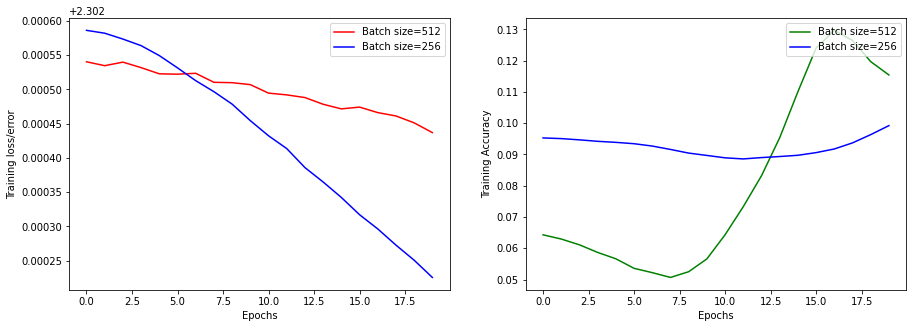

In [18]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Batch size=512') 
plt.plot(range(num_epochs2),train_loss2,'r-',color='blue',label='Batch size=256') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Batch size=512') 
plt.plot(range(num_epochs2),train_acc2,'g-', color='blue',label='Batch size=256') #learning rate in both is same
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [19]:
correct_pred2=0
for data in testLoader2:
    inputs,labels = data
    # Feedforward train data batch through model
    output = net2(inputs)
    # Predicted class is the one with maximum probability
    preds2 = torch.argmax(output,dim=1)
    correct_pred2 += torch.sum(preds2==labels)

test_accuracy2 = correct_pred2.item()/10000.0
print('Testing accuracy (Batch size=256, lr=0.1) = ',test_accuracy2*100) 

Testing accuracy (Batch size=256, lr=0.1) =  10.05


#### Answers to Q4) :  

#### For (Batch Size 512 , LR = 0.1 , Epochs = 20) :  a) Training accuracy = 13%    b) Testing accuracy =  11.4%    c) Training loss =  2.3025   d) Testing loss = 2.3012


#### For (Batch Size 256 , LR = 0.1 , Epochs = 20) : a) Training accuracy = 10.11%    b) Testing accuracy = 10.05%    c) Training loss = 2.3026    d) Testing loss = 2.3021


#### **Q6.a) Varying the Batch_Size (32 to 1024)**


In [20]:
BatchSize_new = [32 , 64 , 128 , 256 , 1024] # change according to system specs
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
trainset_new = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)


# Validation set with random rotations in the range [-90,90]
testset_new = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)


#trainLoader_new = torch.utils.data.DataLoader(trainset_new, batch_size=BatchSize_new[0],shuffle=True, num_workers=4) # Creating dataloader   


#testLoader_new = torch.utils.data.DataLoader(testset_new, batch_size=BatchSize_new[0], shuffle=False, num_workers=4) # Creating dataloader                                                                          

In [21]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x,dim=1)
        

net = LeNet()

In [22]:
#####-------- Function to calculate Test Accuracy and Test Loss-----------###################


def calc_test_loss_VaryingBatch(testLoader_from_model):          
    test_loss = []
    test_acc = []

    running_loss = 0.0 
    running_corr = 0

    testLoader_from_model = testLoader

    for i, data in enumerate(testLoader):
        inputs,labels = data
        # Initializing model gradients to zero
        #optimizer2.zero_grad() 
        # Data feed-forward through the network
        outputs = net(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==labels)    
      
    totalLoss = running_loss/(i+1)
    # Calculating gradients
    #totalLoss2.backward()
    # Updating the model parameters
    # Updating the model parameters
    #optimizer2.step()

    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/10000



    test_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    test_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph


    #print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs2,epoch_loss,epoch_acc*100))
    return np.mean(test_loss) , np.mean(test_acc)

In [24]:
criterion = nn.CrossEntropyLoss() 
learning_rate_new = 0.1
optimizer_new = optim.SGD(net.parameters(), lr=learning_rate_new, momentum=0.9) # SGD
num_epochs_new = 20

In [25]:
train_loss_new = [[] for i in range(5)]
train_acc_new = [[] for i in range(5)]

y = 0

for k in range(5):

    class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x,dim=1)
        

    net = LeNet()

    trainLoader_new = torch.utils.data.DataLoader(trainset_new, batch_size=BatchSize_new[k],shuffle=True, num_workers=0) # Creating dataloader 
    testLoader_new = torch.utils.data.DataLoader(testset_new, batch_size=BatchSize_new[k], shuffle=False, num_workers=0) # Creating dataloader

    optimizer_new = optim.SGD(net.parameters(), lr=learning_rate_new, momentum=0.8) # SGD

    print(color.BOLD + "Batch Size is : {}".format(BatchSize_new[k]) + color.END)

    for epoch in range(num_epochs_new):

        running_loss = 0.0 
        running_corr = 0

        for i,data in enumerate(trainLoader_new):
            inputs,labels = data
            # Initializing model gradients to zero
            optimizer_new.zero_grad() 
            # Data feed-forward through the network
            outputs_new = net(inputs)
            # Predicted class is the one with maximum probability
            preds_new = torch.argmax(outputs_new,dim=1)
            # Finding the loss
            loss = criterion(outputs_new, labels)
            # Accumulating the loss for each batch
            running_loss += loss 
            # Accumulate number of correct predictions
            running_corr += torch.sum(preds_new==labels)    

        totalLoss_new = running_loss/(i+1)
        # Calculating gradients
        totalLoss_new.backward()
        # Updating the model parameters
        # Updating the model parameters
        optimizer_new.step()

        epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
        epoch_acc = running_corr.item()/60000



        train_loss_new[y].append(epoch_loss) #Saving the loss over epochs for plotting the graph
        train_acc_new[y].append(epoch_acc) #Saving the accuracy over epochs for plotting the graph


        print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs_new,epoch_loss,epoch_acc*100))

  
    test_loss,test_acc = calc_test_loss_VaryingBatch(testLoader_new)
    print(color.BOLD + "Test Loss for Batch Size : {} is {} and Test Accuracy is: {}".format(BatchSize_new[k] , test_loss , test_acc) + color.END)
    y = y + 1

    print('----------------------------------------------------------------------------------------------------------------------------------------')
    print('\n')


Batch Size is : 32
Epoch 1/20 : Training loss: 2.3025 | Training Accuracy: 9.8917
Epoch 2/20 : Training loss: 2.3025 | Training Accuracy: 9.8900
Epoch 3/20 : Training loss: 2.3025 | Training Accuracy: 9.8867
Epoch 4/20 : Training loss: 2.3025 | Training Accuracy: 9.8783
Epoch 5/20 : Training loss: 2.3025 | Training Accuracy: 9.8750
Epoch 6/20 : Training loss: 2.3025 | Training Accuracy: 9.8600
Epoch 7/20 : Training loss: 2.3025 | Training Accuracy: 9.8533
Epoch 8/20 : Training loss: 2.3024 | Training Accuracy: 9.8317
Epoch 9/20 : Training loss: 2.3024 | Training Accuracy: 9.8100
Epoch 10/20 : Training loss: 2.3024 | Training Accuracy: 9.7617
Epoch 11/20 : Training loss: 2.3024 | Training Accuracy: 9.7233
Epoch 12/20 : Training loss: 2.3024 | Training Accuracy: 9.6633
Epoch 13/20 : Training loss: 2.3024 | Training Accuracy: 9.5933
Epoch 14/20 : Training loss: 2.3024 | Training Accuracy: 9.5083
Epoch 15/20 : Training loss: 2.3023 | Training Accuracy: 9.4100
Epoch 16/20 : Training loss: 2

----------------------- Train_Loss vs No. of Epochs and Train_Accuracy vs No. of Epochs For Varying Batch Size -----------------------------------------------


Text(0, 0.5, 'Accuracy')

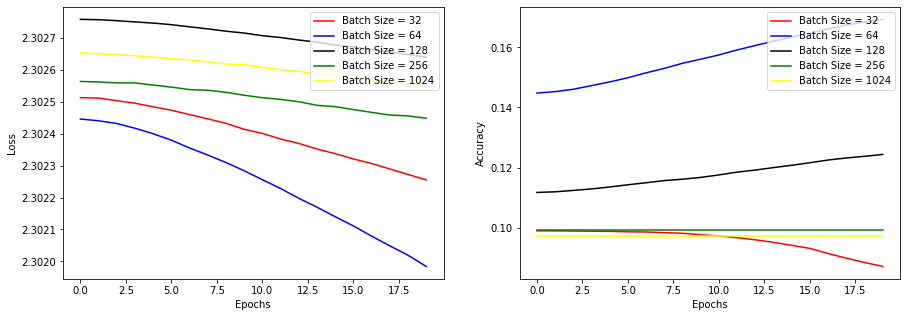

In [29]:
print(color.BOLD + "----------------------- Train_Loss vs No. of Epochs and Train_Accuracy vs No. of Epochs For Varying Batch Size -----------------------------------------------" + color.END)
#for i in range(5):
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs_new),train_loss_new[0],'r-',label='Batch Size = 32') 
plt.plot(range(num_epochs_new),train_loss_new[1],'r-',color = 'blue', label='Batch Size = 64')
plt.plot(range(num_epochs_new),train_loss_new[2],'r-',color = 'black' , label='Batch Size = 128')
plt.plot(range(num_epochs_new),train_loss_new[3],'r-',color = 'green' , label='Batch Size = 256')
plt.plot(range(num_epochs_new),train_loss_new[4],'r-',color = 'yellow' , label='Batch Size = 1024')

#plt.title("Batch Size is : {}".format(BatchSize_new[i]))
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(122)

plt.plot(range(num_epochs_new),train_acc_new[0],'g-',color = 'red' , label='Batch Size = 32') 
plt.plot(range(num_epochs_new),train_acc_new[1],'g-',color = 'blue' , label='Batch Size = 64') 
plt.plot(range(num_epochs_new),train_acc_new[2],'g-',color = 'black' , label='Batch Size = 128') 
plt.plot(range(num_epochs_new),train_acc_new[3],'g-',color = 'green' , label='Batch Size = 256') 
plt.plot(range(num_epochs_new),train_acc_new[4],'g-',color = 'yellow' , label='Batch Size = 1024') 

#plt.title("Batch Size is : {}".format(BatchSize_new[i]))
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

--------------------Test Loss and Test Accuracy plots as a function of Batch Size ---------------


Text(0.5, 0, 'Learning Rates')

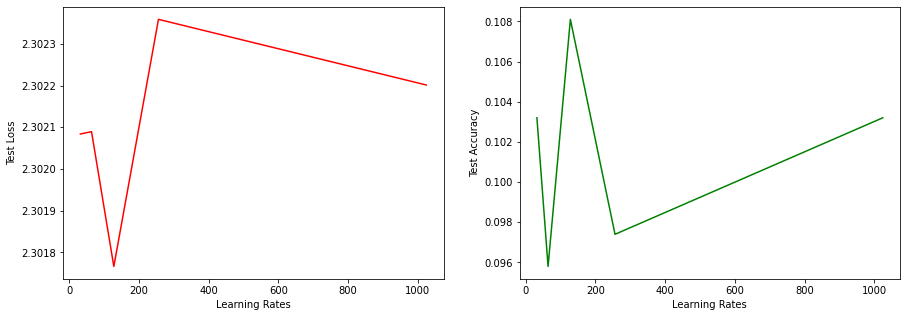

In [28]:
test_loss_vals = [2.302201271057129,  2.302358627319336    , 2.301766204833984   , 2.302089309692383   ,  2.3020837783813475  ]
test_acc_vals = [0.1032,0.0974,0.1081,0.0958,0.1032]
Batch_size_vals = [1024,256,128,64,32]

print(color.BOLD + "--------------------Test Loss and Test Accuracy plots as a function of Batch Size ---------------" + color.END)

fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(Batch_size_vals ,test_loss_vals , 'r-',label = 'Test Loss')
plt.ylabel("Test Loss")
plt.xlabel("Learning Rates")

plt.subplot(122)
plt.plot( Batch_size_vals , test_acc_vals , 'g-',label = 'Test Accuracy')
plt.ylabel("Test Accuracy")
plt.xlabel("Batch Size")

#### **Function to calculate Test Accuracy and Test Loss**

In [33]:
#####-------- Function to calculate Test Accuracy and Test Loss-----------###################


def calc_test_loss():          
    test_loss = []
    test_acc = []

    running_loss = 0.0 
    running_corr = 0

    testLoader_from_model = testLoader
      
    for i, data in enumerate(testLoader):
        inputs,labels = data
        # Initializing model gradients to zero
        #optimizer2.zero_grad() 
        # Data feed-forward through the network
        outputs = net(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==labels)    
      
    totalLoss = running_loss/(i+1)
    # Calculating gradients
    #totalLoss2.backward()
    # Updating the model parameters
    # Updating the model parameters
    #optimizer2.step()
      
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/10000
  
  
      
    test_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    test_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph


    #print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs2,epoch_loss,epoch_acc*100))
    return np.mean(test_loss) , np.mean(test_acc)

#### **Q6.b) Varying the Learning Rates**

In [35]:
criterion = nn.CrossEntropyLoss() 
learning_rate = [ 0.025, 0.05, 0.1, 0.2 ,0.5]
num_epochs = 20
train_loss = [[] for i in range(5)]
train_acc = [[] for i in range(5)]
m = 0
for j in learning_rate:

    class LeNet(nn.Module):
  
        def __init__(self):
            super(LeNet, self).__init__()
            self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
            self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
            self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
            self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
            self.fc1 = nn.Linear(400, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(-1, 400)
            x = F.relu(self.fc1(x)) 
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return F.softmax(x,dim=1)
        

    net = LeNet()

    optimizer1 = optim.SGD(net.parameters(), lr=j, momentum = 0.9) # SGD
    print(color.BOLD + "Learning Rate is :"  + color.END)
    print(j)
    
    for epoch in range(num_epochs):
        running_loss = 0.0 
        running_corr = 0


        for i,data in enumerate(trainLoader):
            inputs,labels = data
            # Initializing model gradients to zero
            optimizer1.zero_grad() 
            # Data feed-forward through the network
            outputs = net(inputs)
            # Predicted class is the one with maximum probability
            preds = torch.argmax(outputs,dim=1)
            # Finding the loss
            loss = criterion(outputs, labels) 
            # Accumulating the loss for each batch
            running_loss += loss 
            # Accumulate number of correct predictions
            running_corr += torch.sum(preds==labels)    

        totalLoss = running_loss/(i+1)
        # Calculating gradients
        totalLoss.backward()
        # Updating the model parameters
        optimizer1.step()

        epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
        epoch_acc = running_corr.item()/60000



        train_loss[m].append(epoch_loss) #Saving the loss over epochs for plotting the graph
        train_acc[m].append(epoch_acc) #Saving the accuracy over epochs for plotting the graph

        

        print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))
        
    test_loss,test_acc = calc_test_loss()
    print(color.BOLD + "Test Loss for learning rate : {} is {} and Test Accuracy is: {}".format(j , test_loss , test_acc) + color.END)

    m  = m + 1
    print('----------------------------------------------------------------------------------------------------------------------------------------')
    print('\n')

Learning Rate is :
0.025
Epoch 1/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 2/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 3/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 4/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 5/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 6/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 7/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 8/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 9/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 10/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 11/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 12/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 13/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 14/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 15/20 : Training loss: 2.3025 | Training Accuracy: 11.2367
Epoch 16/

----------------------- Train_Loss vs No. of Epochs and Train_Accuracy vs No. of Epochs For Varying Learning Rates -----------------------------------------------


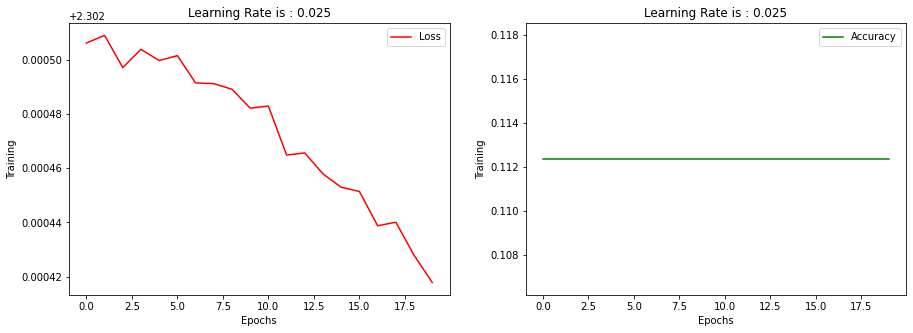

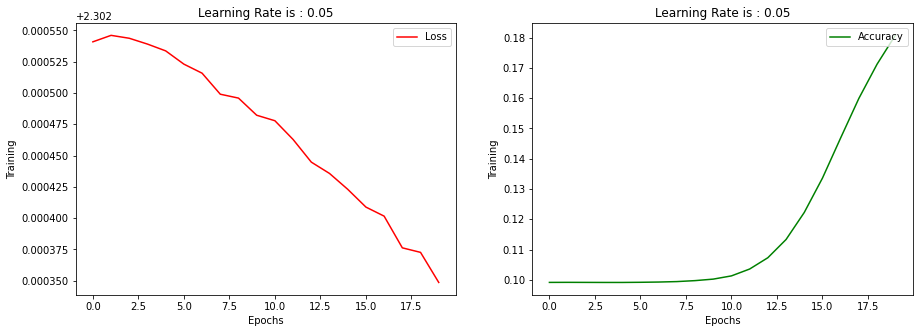

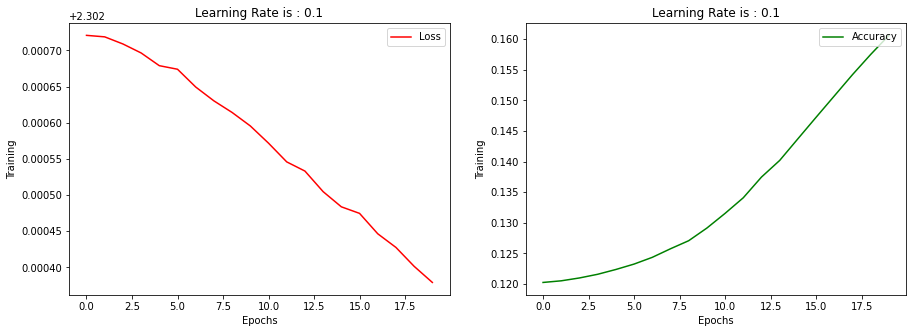

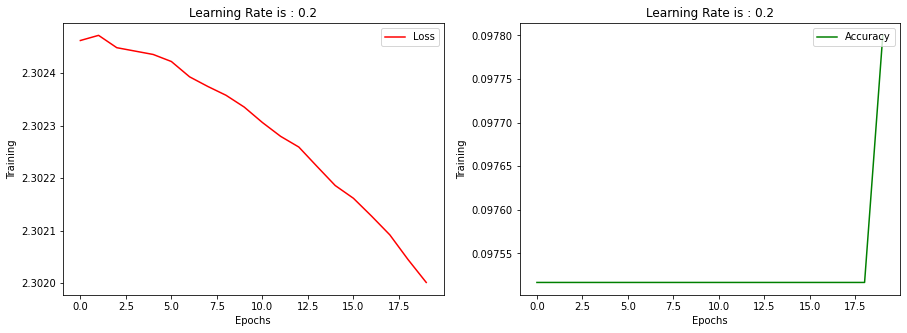

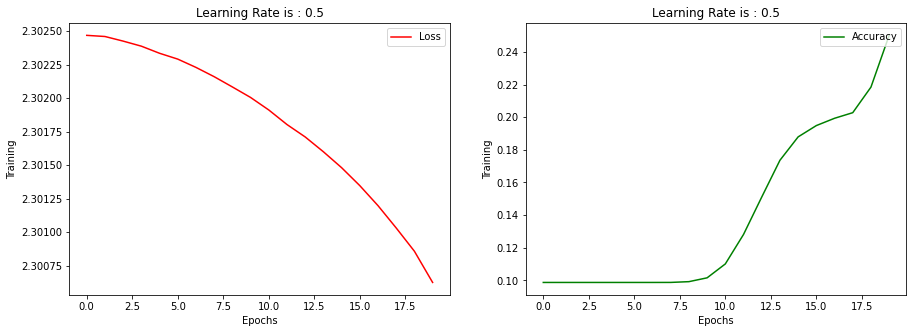

In [36]:
print(color.BOLD + "----------------------- Train_Loss vs No. of Epochs and Train_Accuracy vs No. of Epochs For Varying Learning Rates -----------------------------------------------" + color.END)
for i in range(5):
    fig = plt.figure(figsize=[15,5]) 
    plt.subplot(121)
    plt.plot(range(num_epochs),train_loss[i],'r-',label='Loss') 
    plt.title("Learning Rate is : {}".format(learning_rate[i]))
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Training')
    plt.subplot(122)
    plt.plot(range(num_epochs),train_acc[i],'g-',label='Accuracy') 
    plt.title("Learning Rate is : {}".format(learning_rate[i]))
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Training')

--------------------Test Loss and Test Accuracy plots as a function of Learning Rates---------------


Text(0.5, 0, 'Learning Rates')

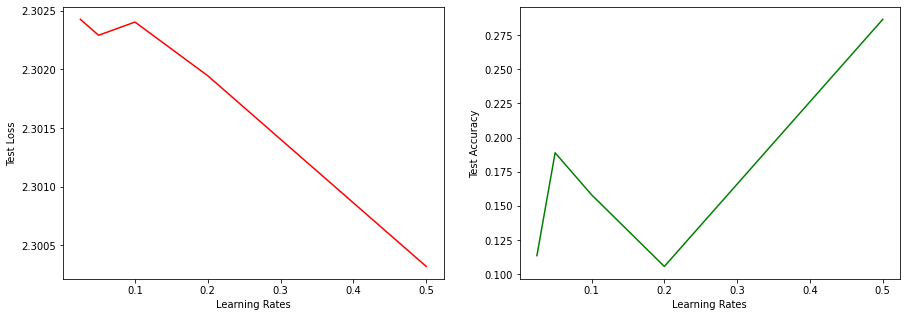

In [37]:
test_loss_vals = [2.3003208160400392  ,2.301945114135742 , 2.302402877807617  , 2.3022899627685547 ,  2.302425765991211  ]
test_acc_vals = [0.2865,0.1056,0.1581,0.1888,0.1135]
lr_vals = [0.5,0.2,0.1,0.05,0.025]

print(color.BOLD + "--------------------Test Loss and Test Accuracy plots as a function of Learning Rates---------------" + color.END)

fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(lr_vals ,test_loss_vals , 'r-',label = 'Test Loss')
plt.ylabel("Test Loss")
plt.xlabel("Learning Rates")

plt.subplot(122)
plt.plot( lr_vals , test_acc_vals , 'g-',label = 'Test Accuracy')
plt.ylabel("Test Accuracy")
plt.xlabel("Learning Rates")

#### **Q6.c) Stochastic Gradient Descent with Restarts (SGDR)**

In [39]:
class LeNet(nn.Module):
  
      def __init__(self):
            super(LeNet, self).__init__()
            self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
            self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
            self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
            self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
            self.fc1 = nn.Linear(400, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(-1, 400)
            x = F.relu(self.fc1(x)) 
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return F.softmax(x,dim=1)
        

net = LeNet()


criterion = nn.CrossEntropyLoss() 
learning_rate = [0.5 , 0.2 , 0.1 , 0.05]
num_epochs = 40
optimizer1 = optim.SGD(net.parameters(), lr=learning_rate[0], momentum = 0.9) # SGD
train_loss = []
train_acc = []
t = 0



for epoch in range(num_epochs):
    
    if(epoch%10== 0):

        optimizer1 = optim.SGD(net.parameters(), lr=learning_rate[t], momentum = 0.9) # SGD
        print(color.BOLD + "Learning Rate is : {}".format(learning_rate[t]) + color.END)
        t = t + 1

    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        # Initializing model gradients to zero
        optimizer1.zero_grad() 
        # Data feed-forward through the network
        outputs = net(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = criterion(outputs, labels) 
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==labels)    
        
    totalLoss = running_loss/(i+1)
    # Calculating gradients
    totalLoss.backward()
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

Learning Rate is : 0.5
Epoch 1/40 : Training loss: 2.3028 | Training Accuracy: 9.8033
Epoch 2/40 : Training loss: 2.3028 | Training Accuracy: 9.7900
Epoch 3/40 : Training loss: 2.3028 | Training Accuracy: 9.7933
Epoch 4/40 : Training loss: 2.3028 | Training Accuracy: 9.7967
Epoch 5/40 : Training loss: 2.3027 | Training Accuracy: 9.8500
Epoch 6/40 : Training loss: 2.3027 | Training Accuracy: 9.8617
Epoch 7/40 : Training loss: 2.3027 | Training Accuracy: 9.8683
Epoch 8/40 : Training loss: 2.3026 | Training Accuracy: 9.8650
Epoch 9/40 : Training loss: 2.3025 | Training Accuracy: 9.8633
Epoch 10/40 : Training loss: 2.3025 | Training Accuracy: 9.8650
Learning Rate is : 0.2
Epoch 11/40 : Training loss: 2.3024 | Training Accuracy: 9.8650
Epoch 12/40 : Training loss: 2.3024 | Training Accuracy: 9.8650
Epoch 13/40 : Training loss: 2.3024 | Training Accuracy: 9.8650
Epoch 14/40 : Training loss: 2.3024 | Training Accuracy: 9.8650
Epoch 15/40 : Training loss: 2.3024 | Training Accuracy: 9.8650
Epo

Text(0, 0.5, 'Training')

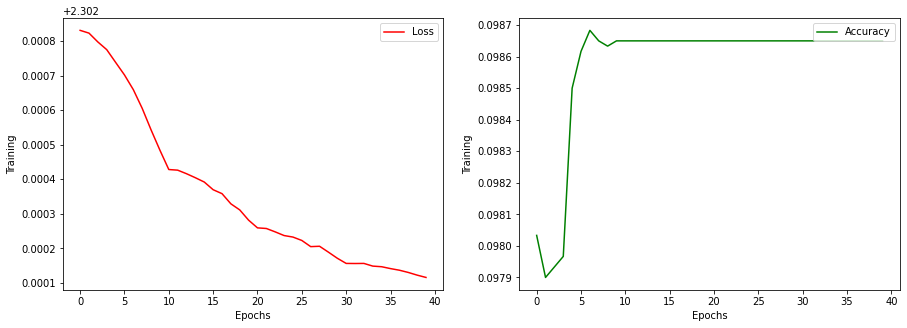

In [40]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

#### Answer to Q6.b) From the plot of Accuracy Vs Learning Rates we can clearly see that Accuracy is Maxmimum and Loss is minimum for Learning Rate ~ 0.5. Therefore learning rate close to that value would be preferable

#### Answer to Q6.c) Here we reduce the learning rate after 10 epochs interval. The SGDR plot of Loss vs No. of Epochs shows epoch wise loss decrement i.e training loss is decreasing step-wise(here step-size = 10epochs) which could clearly be observed through the kinks in the curve. That is the model is converging steadily as we keep on decreasing the learning rate with increasing no. of iterations.